# Genetic algorithm

In [1]:
# Imports
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.stats import linregress
from qiskit.quantum_info import SparsePauliOp
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

## Observables


In [2]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian_H2 = pickle.load(f)

Z1Z2_obs = SparsePauliOp.from_list([("ZZ", -1)])

### Z1Z2 2-local minimization

{'minimum_value': -0.9526430716014821, 'optimal_parameters': [0.0, 0.0, 1.0497389869074605, 0.0, 5.54243014361292, 0.0], 'n_evaluations': 36, 'n_generations': 7, 'cost_history': [-0.06296279939845707, -0.5526422961032267, -0.5526422961032267, -0.8755446479836748, -0.8755446479836748, -0.8755446479836748, -0.9526430716014821]}


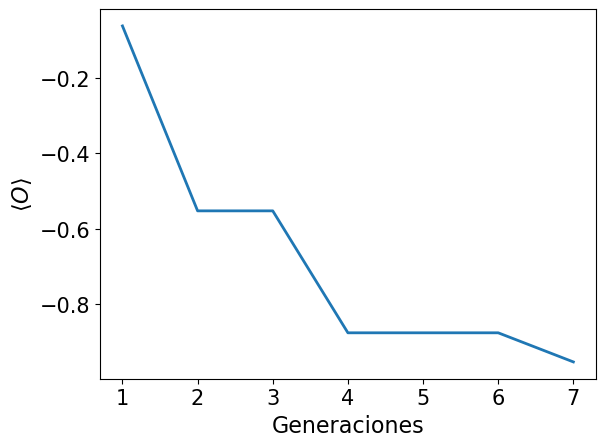

In [ ]:
# Convergencia
minimization_data = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, -0.95, crossover_prob=0.8, mutation_prob=0.6, population_size=5, max_iters=100, print_info=False, plot_info=False)

print(minimization_data)

plt.plot(range(1, minimization_data["n_generations"]+1), minimization_data["cost_history"], label=r"$\langle O\rangle$", linewidth=2)

plt.xlabel(r"Generaciones", size=16)
plt.ylabel(r"$\langle O\rangle$", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")

plt.show()

{'minimum_value': -0.8502583817144787, 'optimal_parameters': [1.8974770910427214, 0.0, 0.0, 1.0, 5.0197764032564836, 0.0], 'n_evaluations': 433, 'n_generations': 100, 'cost_history': [-0.6247132225760426, -0.6247132225760426, -0.6247132225760426, -0.6247132225760426, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.6711464178933496, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8056240773298186, -0.8502583817144787, -0.850258381714478

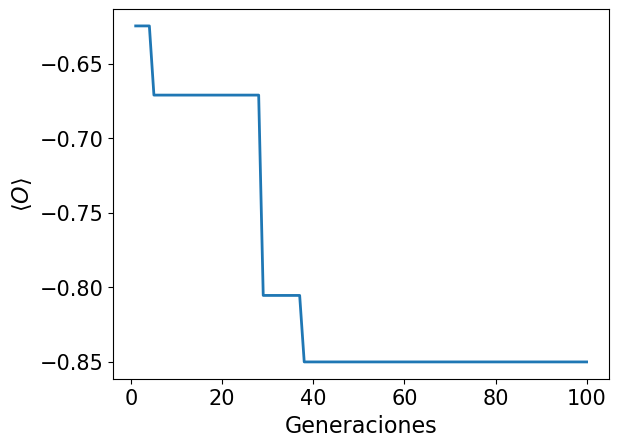

In [36]:
# No convergencia
minimization_data = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, -0.95, crossover_prob=0.8, mutation_prob=0.6, population_size=5, max_iters=100, print_info=False, plot_info=False)

print(minimization_data)

plt.plot(range(1, minimization_data["n_generations"]+1), minimization_data["cost_history"], label=r"$\langle O\rangle$", linewidth=2)

plt.xlabel(r"Generaciones", size=16)
plt.ylabel(r"$\langle O\rangle$", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")

plt.show()

### Z1Z2 2-local distibution

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Población a usar en este experimento
pop = 5

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    t0 = time.time()
    data_Z1Z2_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, -0.95, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_iters=100, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data_Z1Z2_2local["n_generations"]
    evaluations_exp[iter] = data_Z1Z2_2local["n_evaluations"]
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {data_Z1Z2_2local['n_generations']} generations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_GA_Z1Z2_twolocal_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Experiment 0 terminated with 0 generations.

Experiment 1 terminated with 73 generations.

Experiment 2 terminated with 2 generations.

Experiment 3 terminated with 0 generations.

Experiment 4 terminated with 0 generations.

Experiment 5 terminated with 4 generations.

Experiment 6 terminated with 11 generations.

Experiment 7 terminated with 100 generations.

Experiment 8 terminated with 5 generations.

Experiment 9 terminated with 100 generations.

Experiment 10 terminated with 13 generations.

Experiment 11 terminated with 6 generations.

Experiment 12 terminated with 13 generations.

Experiment 13 terminated with 0 generations.

Experiment 14 terminated with 17 generations.

Experiment 15 terminated with 100 generations.

Experiment 16 terminated with 65 generations.

Experiment 17 terminated with 3 generations.

Experiment 18 terminated with 100 generations.

Experiment 19 terminated with 100 generations.

Experiment 20 terminated with 0 generations.

Experiment 21 terminated wit

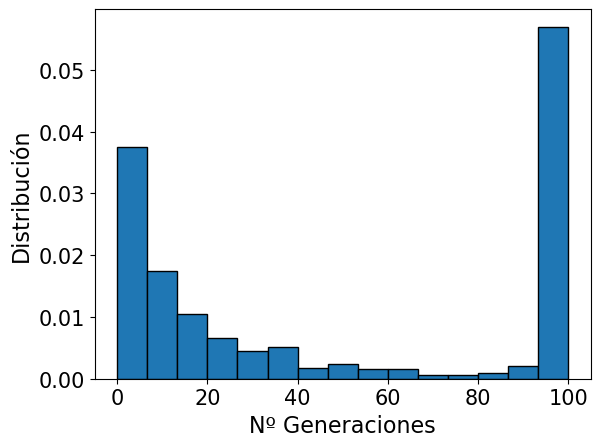

Regresión: LinregressResult(slope=-1.175593830087867, intercept=-1.0823862478221766, rvalue=-0.9289809095528258, pvalue=5.658380047407472e-07, stderr=0.12990634096893322, intercept_stderr=0.4792946671560398)


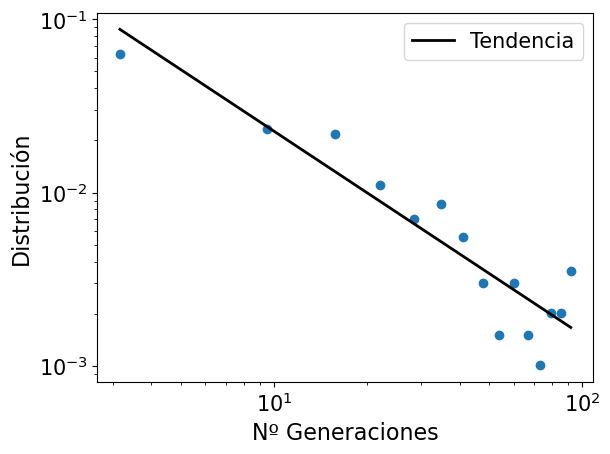

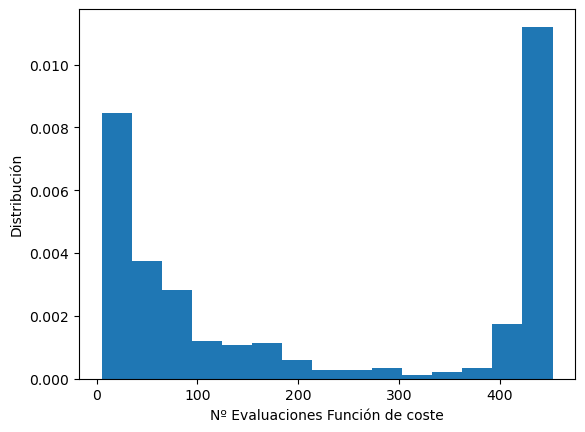

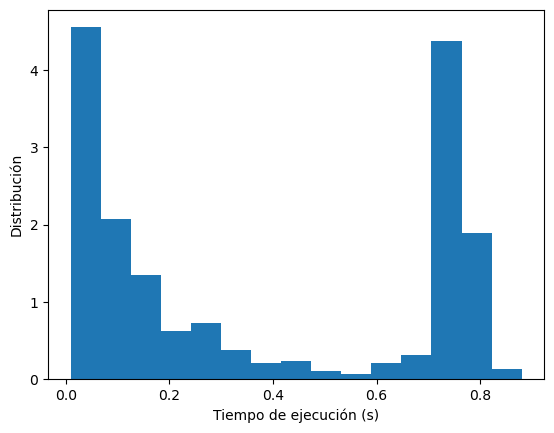

In [14]:
# Cargo los datos
loaded_data = np.loadtxt("data/genetic/data_GA_Z1Z2_twolocal_5.csv", delimiter=",")

n_bars = 15

# Generations histogram
hist = np.histogram(loaded_data[:, 0], n_bars, density=True)
max_value = np.max(loaded_data[:, 0])
x_data = hist[1][:-1]+max_value/n_bars/2
y_data = hist[0]
plt.bar(x_data, y_data, max_value/n_bars, edgecolor="black")

plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Generaciones", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

# Reduced generations histogram scatter
gen_data = loaded_data[:, 0]
# Clean big values
clean_gen_data = gen_data[gen_data < 100]

# Quito los casos de prob nula por no cometer crimenes logaritmicos
x_data = x_data[y_data != 0]
y_data = y_data[y_data != 0]

hist = np.histogram(clean_gen_data, n_bars, density=True)
max_value = np.max(clean_gen_data)
x_data = hist[1][:-1]+max_value/n_bars/2
y_data = hist[0]
plt.scatter(x_data, y_data)
plt.xscale("log")
plt.yscale("log")

regress = linregress(np.log(x_data), np.log(y_data))
print("Regresión:", regress)
plt.plot(x_data, x_data**(regress.slope)*np.exp(regress.intercept), label="Tendencia", color="black", linewidth=2)
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Generaciones", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.legend(fontsize="15")
plt.show()

plt.show()

# Evaluations histogram
hist = np.histogram(loaded_data[:, 1], n_bars, density=True)
max_value = np.max(loaded_data[:, 1])
x_data = hist[1][:-1]+max_value/n_bars/2
y_data = hist[0]
plt.bar(x_data, y_data, max_value/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Nº Evaluaciones Función de coste")
plt.show()

n_bars = 15
# Time histogram
hist = np.histogram(loaded_data[:, 2], n_bars, density=True)
max_value = np.max(loaded_data[:, 2])
x_data = hist[1][:-1]+max_value/n_bars/2
y_data = hist[0]
plt.bar(x_data, y_data, max_value/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Tiempo de ejecución (s)")
plt.show()

### H2 N-local distibution

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 50

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)

for iter in range(1000):

    t0 = time.time()
    data_H2_2local = mit.VQE_minimization_AG(anz.build_Nlocal_ansatz(4,2)[0], hamiltonian_H2, -1.75, population_size=pop, max_iters=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data_H2_2local["n_generations"]
    evaluations_exp[iter] = data_H2_2local["n_evaluations"]
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated \n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_GA_H2_Nlocal_{pop}.csv", array_to_save, fmt="%d", delimiter=",")

NameError: name 'np' is not defined

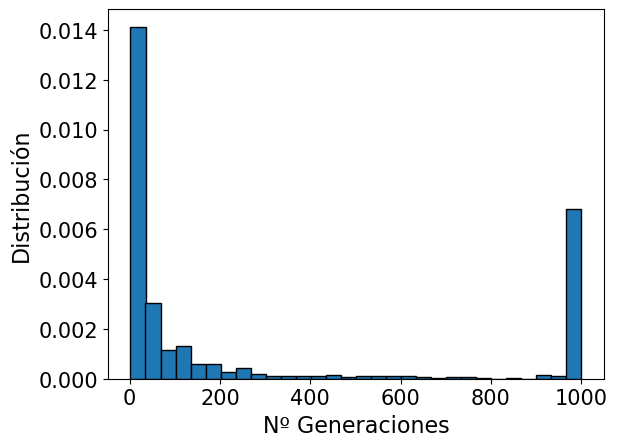

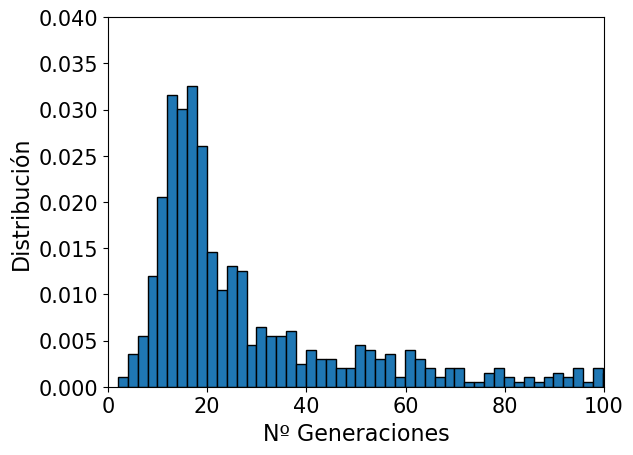

Regresión: LinregressResult(slope=-0.6832926857892553, intercept=-3.1243432363861423, rvalue=-0.775327428528266, pvalue=5.9335265006429745e-34, stderr=0.043865485978723, intercept_stderr=0.2280272551117551)


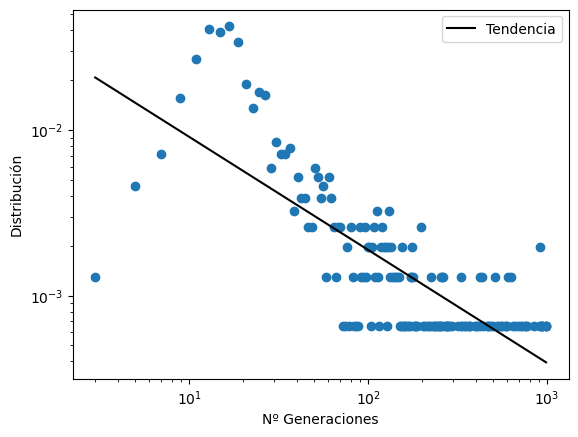

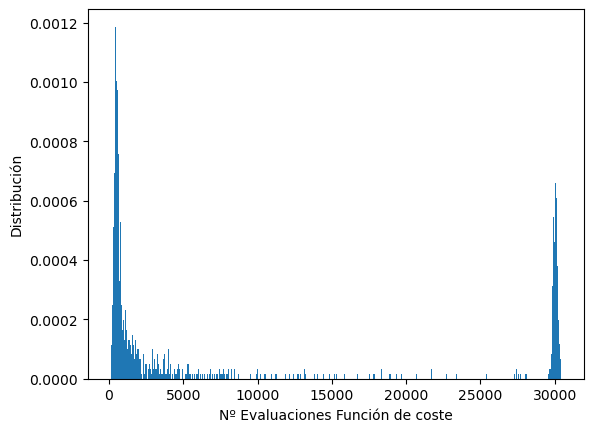

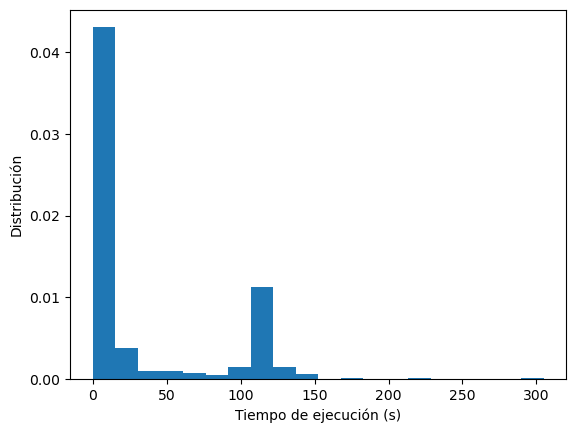

In [12]:
# Cargo los datos
loaded_data = np.loadtxt("data/genetic/data_GA_H2_Nlocal_50.csv", delimiter=",")

# Generations histogram
n_bars = 30
hist = np.histogram(loaded_data[:, 0], n_bars, density=True)
max_value = np.max(loaded_data[:, 0])
plt.bar(hist[1][:-1]+max_value/n_bars/2, hist[0], max_value/n_bars, edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Generaciones", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

# Generations histogram ZOOM
n_bars = 500
hist = np.histogram(loaded_data[:, 0], n_bars, density=True)
max_value = np.max(loaded_data[:, 0])
plt.bar(hist[1][:-1]+max_value/n_bars/2, hist[0], max_value/n_bars, edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Generaciones", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.xlim(0, 100)
plt.ylim(0, 0.04)
plt.show()


# Reduced generations histogram scatter
gen_data = loaded_data[:, 0]
# Clean big values
clean_gen_data = gen_data[gen_data < 1000]
hist = np.histogram(clean_gen_data, n_bars, density=True)
max_value = np.max(clean_gen_data)
x_data = hist[1][:-1]+max_value/n_bars/2
y_data = hist[0]
plt.scatter(x_data, y_data)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Distribución")
plt.xlabel("Nº Generaciones")

# Quito los casos de prob nula par no cometer crimenes logaritmicos
x_data = x_data[y_data != 0]
y_data = y_data[y_data != 0]

regress = linregress(np.log(x_data), np.log(y_data))
print("Regresión:", regress)
plt.plot(x_data, x_data**(regress.slope)*np.exp(regress.intercept), label="Tendencia", color="black")
plt.legend()
plt.show()

# Evaluations histogram
hist = np.histogram(loaded_data[:, 1], n_bars, density=True)
max_value = np.max(loaded_data[:, 1])
plt.bar(hist[1][:-1]+max_value/n_bars/2, hist[0], max_value/n_bars)
plt.ylabel("Distribución")
plt.xlabel("Nº Evaluaciones Función de coste")
plt.show()


n_bars_time = 20
# Time histogram
time_data = loaded_data[:, 2]
# Limpio los datos de datos excesivos, ordenador hibernando.
clean_time_data = time_data[time_data < 400]
hist = np.histogram(clean_time_data, n_bars_time, density=True)
max_value = np.max(clean_time_data)
plt.bar(hist[1][:-1]+max_value/n_bars_time/2, hist[0], max_value/n_bars_time)
plt.ylabel("Distribución")
plt.xlabel("Tiempo de ejecución (s)")
plt.show()

## GA as previous step

### Z1Z2 2-local

GA + COBYLA

In [5]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Población a usar en este experimento
pop = 5

# Numero maximo de generaciones
max_gen = 40

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments, dtype=int)
generations_exp = np.zeros(n_experiments, dtype=int)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    # Booleano para comprobar convergencia del AG
    converg = False

    t0 = time.time()
    while not converg:

        AG_data_Z1Z2_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, -0.95, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_iters=max_gen, print_info=False, plot_info=False)
        evaluations_exp[iter] += AG_data_Z1Z2_2local["n_evaluations"]
        
        # Si el AG converge
        if AG_data_Z1Z2_2local["n_generations"] < max_gen:
            converg = True

    evaluations_exp[iter] +=  mit.VQE_minimization(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, initial_guess=AG_data_Z1Z2_2local["optimal_parameters"])["iters"]

    t1 = time.time()
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_GA+COBYLA_Z1Z2_twolocal_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Experiment 0 terminated with 79 evaluations.

Experiment 1 terminated with 652 evaluations.

Experiment 2 terminated with 107 evaluations.

Experiment 3 terminated with 284 evaluations.

Experiment 4 terminated with 97 evaluations.

Experiment 5 terminated with 296 evaluations.

Experiment 6 terminated with 167 evaluations.

Experiment 7 terminated with 110 evaluations.

Experiment 8 terminated with 285 evaluations.

Experiment 9 terminated with 87 evaluations.

Experiment 10 terminated with 497 evaluations.

Experiment 11 terminated with 115 evaluations.

Experiment 12 terminated with 302 evaluations.

Experiment 13 terminated with 417 evaluations.

Experiment 14 terminated with 88 evaluations.

Experiment 15 terminated with 74 evaluations.

Experiment 16 terminated with 433 evaluations.

Experiment 17 terminated with 442 evaluations.

Experiment 18 terminated with 444 evaluations.

Experiment 19 terminated with 296 evaluations.

Experiment 20 terminated with 95 evaluations.

Experime

Only COBYLA

In [6]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Población a usar en este experimento
pop = 5

# Numero maximo de generaciones
max_gen = 40

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments, dtype=int)
generations_exp = np.zeros(n_experiments, dtype=int)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    t0 = time.time()

    evaluations_exp[iter] = mit.VQE_minimization(anz.build_twoLocal_ansatz(2, 2)[0], Z1Z2_obs, initial_guess="rand")["iters"]

    t1 = time.time()
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_COBYLA_Z1Z2_twolocal.csv", array_to_save, fmt="%f", delimiter=",")

Experiment 0 terminated with 76 evaluations.

Experiment 1 terminated with 82 evaluations.

Experiment 2 terminated with 91 evaluations.

Experiment 3 terminated with 74 evaluations.

Experiment 4 terminated with 79 evaluations.

Experiment 5 terminated with 96 evaluations.

Experiment 6 terminated with 72 evaluations.

Experiment 7 terminated with 75 evaluations.

Experiment 8 terminated with 85 evaluations.

Experiment 9 terminated with 81 evaluations.

Experiment 10 terminated with 88 evaluations.

Experiment 11 terminated with 78 evaluations.

Experiment 12 terminated with 75 evaluations.

Experiment 13 terminated with 83 evaluations.

Experiment 14 terminated with 76 evaluations.

Experiment 15 terminated with 77 evaluations.

Experiment 16 terminated with 89 evaluations.

Experiment 17 terminated with 92 evaluations.

Experiment 18 terminated with 75 evaluations.

Experiment 19 terminated with 80 evaluations.

Experiment 20 terminated with 89 evaluations.

Experiment 21 terminate

Plots

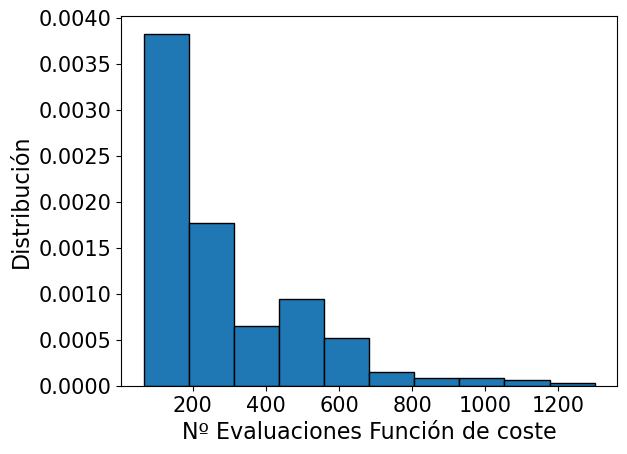

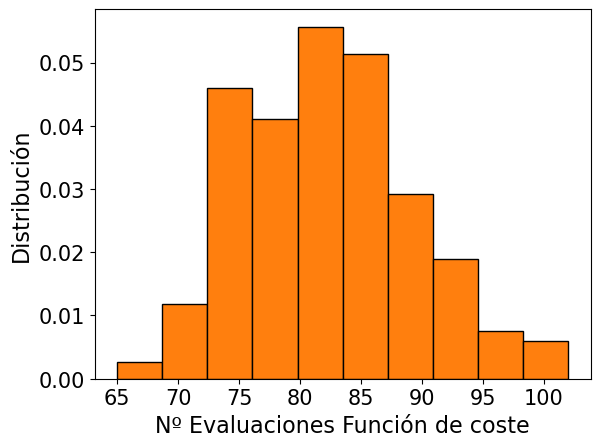

In [37]:
# Cargo los datos
AG_COBYLA_loaded_data = np.loadtxt("data/genetic/data_GA+COBYLA_Z1Z2_twolocal_5.csv", delimiter=",")
COBYLA_loaded_data = np.loadtxt("data/genetic/data_COBYLA_Z1Z2_twolocal.csv", delimiter=",")

# Evaluations histogram
n_bars = 10
AG_COBYLA_hist = np.histogram(AG_COBYLA_loaded_data[:, 1], n_bars, density=True)
COBYLA_hist = np.histogram(COBYLA_loaded_data[:, 1], n_bars, density=True)

AG_COBYLA_max_value = np.max(AG_COBYLA_loaded_data[:, 1])
AG_COBYLA_min_value = np.min(AG_COBYLA_loaded_data[:, 1])
COBYLA_max_value = np.max(COBYLA_loaded_data[:, 1])
COBYLA_min_value = np.min(COBYLA_loaded_data[:, 1])

plt.bar(AG_COBYLA_hist[1][:-1] + (AG_COBYLA_max_value - AG_COBYLA_min_value)/n_bars/2, AG_COBYLA_hist[0], (AG_COBYLA_max_value - AG_COBYLA_min_value)/n_bars, edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Evaluaciones Función de coste", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

plt.bar(COBYLA_hist[1][:-1] + (COBYLA_max_value - COBYLA_min_value)/n_bars/2, COBYLA_hist[0], (COBYLA_max_value - COBYLA_min_value)/n_bars, color = "C1", edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Evaluaciones Función de coste", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

### H2 2-local

GA + COBYLA

In [31]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Población a usar en este experimento
pop = 25

# Numero maximo de generaciones
max_gen = 50

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments, dtype=int)
generations_exp = np.zeros(n_experiments, dtype=int)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    # Booleano para comprobar convergencia del AG
    converg = False

    t0 = time.time()
    while not converg:

        AG_data_H2_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(4, 2)[0], hamiltonian_H2, -1.75, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_iters=max_gen, print_info=False, plot_info=False)
        evaluations_exp[iter] += AG_data_H2_2local["n_evaluations"]
        
        # Si el AG converge
        if AG_data_H2_2local["n_generations"] < max_gen:
            converg = True

    evaluations_exp[iter] +=  mit.VQE_minimization(anz.build_twoLocal_ansatz(4, 2)[0], hamiltonian_H2, initial_guess=AG_data_H2_2local["optimal_parameters"])["iters"]

    t1 = time.time()
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_GA+COBYLA_H2_twolocal_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Experiment 0 terminated with 2621 evaluations.

Experiment 1 terminated with 4259 evaluations.

Experiment 2 terminated with 6395 evaluations.

Experiment 3 terminated with 654 evaluations.

Experiment 4 terminated with 6259 evaluations.

Experiment 5 terminated with 6177 evaluations.

Experiment 6 terminated with 1941 evaluations.

Experiment 7 terminated with 6266 evaluations.

Experiment 8 terminated with 10118 evaluations.

Experiment 9 terminated with 2982 evaluations.

Experiment 10 terminated with 4863 evaluations.

Experiment 11 terminated with 2474 evaluations.

Experiment 12 terminated with 4073 evaluations.

Experiment 13 terminated with 2943 evaluations.

Experiment 14 terminated with 4353 evaluations.

Experiment 15 terminated with 3500 evaluations.

Experiment 16 terminated with 1639 evaluations.

Experiment 17 terminated with 2164 evaluations.

Experiment 18 terminated with 4607 evaluations.

Experiment 19 terminated with 9436 evaluations.

Experiment 20 terminated with 

Only COBYLA

In [32]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments, dtype=int)
generations_exp = np.zeros(n_experiments, dtype=int)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    t0 = time.time()

    evaluations_exp[iter] = mit.VQE_minimization(anz.build_twoLocal_ansatz(4, 2)[0], hamiltonian_H2, initial_guess="rand")["iters"]

    t1 = time.time()
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_COBYLA_H2_twolocal.csv", array_to_save, fmt="%f", delimiter=",")

Experiment 0 terminated with 8385 evaluations.

Experiment 1 terminated with 1532 evaluations.

Experiment 2 terminated with 3445 evaluations.

Experiment 3 terminated with 3384 evaluations.

Experiment 4 terminated with 8706 evaluations.

Experiment 5 terminated with 2672 evaluations.

Experiment 6 terminated with 5589 evaluations.

Experiment 7 terminated with 1430 evaluations.

Experiment 8 terminated with 4194 evaluations.

Experiment 9 terminated with 4484 evaluations.

Experiment 10 terminated with 3071 evaluations.

Experiment 11 terminated with 3006 evaluations.

Experiment 12 terminated with 2996 evaluations.

Experiment 13 terminated with 1778 evaluations.

Experiment 14 terminated with 2953 evaluations.

Experiment 15 terminated with 2637 evaluations.

Experiment 16 terminated with 1634 evaluations.

Experiment 17 terminated with 2297 evaluations.

Experiment 18 terminated with 4237 evaluations.

Experiment 19 terminated with 5056 evaluations.

Experiment 20 terminated with 

Plots

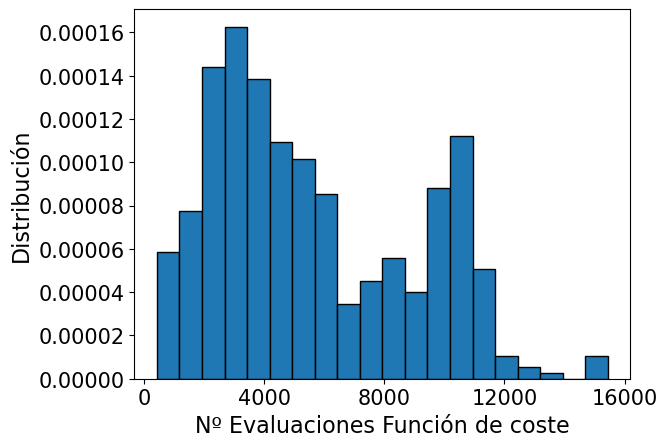

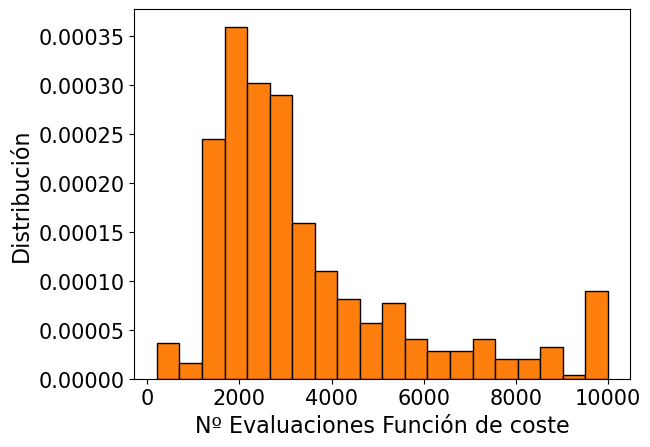

In [48]:
# Cargo los datos
AG_COBYLA_loaded_data = np.loadtxt("data/genetic/data_GA+COBYLA_H2_twolocal_25.csv", delimiter=",")
COBYLA_loaded_data = np.loadtxt("data/genetic/data_COBYLA_H2_twolocal.csv", delimiter=",")

# Evaluations histogram
n_bars = 20
AG_COBYLA_hist = np.histogram(AG_COBYLA_loaded_data[:, 1], n_bars, density=True)
COBYLA_hist = np.histogram(COBYLA_loaded_data[:, 1], n_bars, density=True)

AG_COBYLA_max_value = np.max(AG_COBYLA_loaded_data[:, 1])
AG_COBYLA_min_value = np.min(AG_COBYLA_loaded_data[:, 1])
COBYLA_max_value = np.max(COBYLA_loaded_data[:, 1])
COBYLA_min_value = np.min(COBYLA_loaded_data[:, 1])

plt.bar(AG_COBYLA_hist[1][:-1] + (AG_COBYLA_max_value - AG_COBYLA_min_value)/n_bars/2, AG_COBYLA_hist[0], (AG_COBYLA_max_value - AG_COBYLA_min_value)/n_bars, edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Evaluaciones Función de coste", size=16)
plt.xticks(fontsize="15", ticks=np.linspace(0, 16000, 5))
plt.yticks(fontsize="15")
plt.show()

plt.bar(COBYLA_hist[1][:-1] + (COBYLA_max_value - COBYLA_min_value)/n_bars/2, COBYLA_hist[0], (COBYLA_max_value - COBYLA_min_value)/n_bars, color = "C1", edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Evaluaciones Función de coste", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

## H2O Molecule

In [ ]:
# Hamiltonians
with open(f"H2O/data/hamiltonian1.000.pkl", "rb") as f:
    hamiltonian_H2O = pickle.load(f)

### N-local


Preparando ejecución para 14 qubits.
Se usarán 63 parámetros


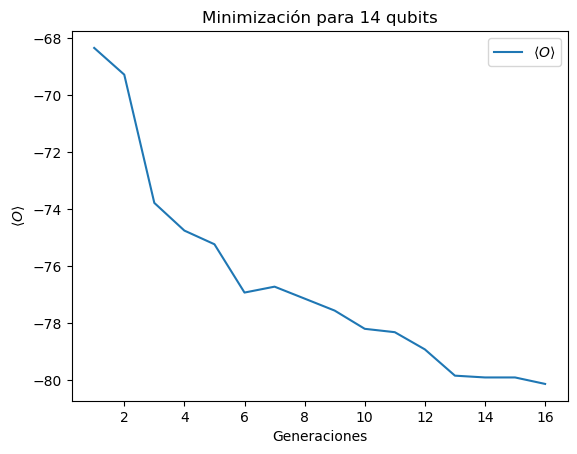

Fin ejecución con 14 qubits. Mínimo encontrado: -80.1390479077481
Número de generaciones: 16
Número de evaluaciones de la función de coste: 1076

Preparando ejecución para 15 qubits.
Se usarán 66 parámetros


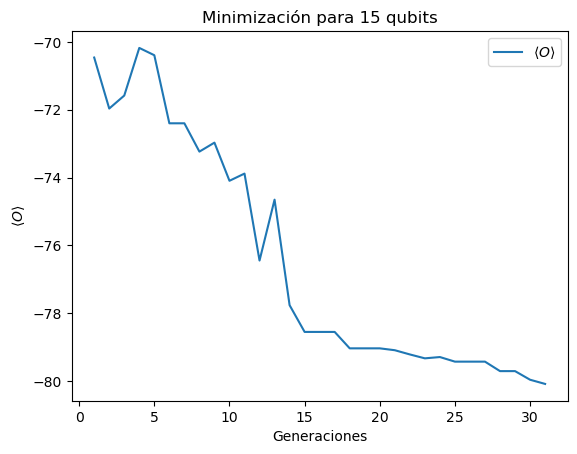

Fin ejecución con 15 qubits. Mínimo encontrado: -80.08257050709199
Número de generaciones: 31
Número de evaluaciones de la función de coste: 1976

Preparando ejecución para 16 qubits.
Se usarán 72 parámetros


KeyboardInterrupt: 

In [ ]:
data_H20_Nlocal = mit.VQE_minimization_AG(anz.build_Nlocal_ansatz, 14, 14, hamiltonian_H2O, -80, population_size=100, max_iters=1000)

### 2-local


Preparando ejecución para 14 qubits.
Se usarán 28 parámetros


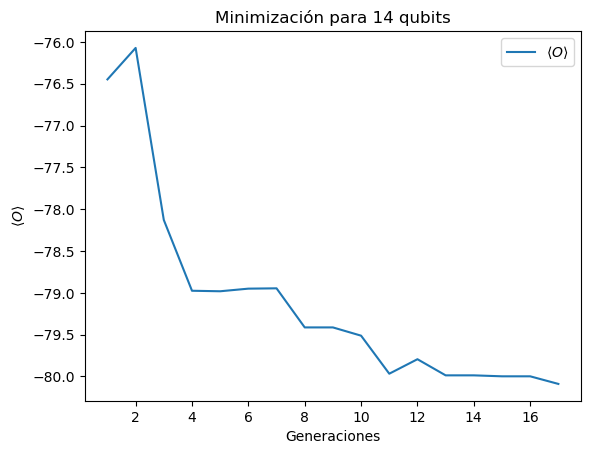

Fin ejecución con 14 qubits. Mínimo encontrado: -80.0894404108026
Número de generaciones: 17
Número de evaluaciones de la función de coste: 575


In [ ]:
data_H2O_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz, 14, 14, hamiltonian_H2O, -80, population_size=50, max_iters=1000)

In [ ]:
from scipy.optimize import differential_evolution


# ====================================================================
#            VQE implementation for BP study
# ====================================================================
def VQE_minimization_DE(ansatz_function, minQubits: int, maxQubits: int, base_observable, initial_guess: str = "zero", print_info: bool = True, plot_info: bool = True):
    """
    Compute the VQE algorithm using different numbers of qubits, then plot the minimization progess and the derivatives information.
    -----------------------------------------
    Args:
        ansatz_function (method): A function defined as follows: ansatz_function(N_qubits (int)) -> qc (QuantumCircuit), num_params (int)
        minQubits (int): The smallest number of qubits used.
        maxQubits (int): The greatest number of qubits used.
        base_observable (SparsePauliOp): The observable to be measured in its minimal form, it should use minQubits number of qubits.
        index (list[int] or str): With respect to which parameters the derivative will be taken. If given "all", it calculates all the derivatives.
        initial_guess (str or NumPy 1D array): "zero" initial guess with all parameters equal to cero, "rand" -> random initial guess. 1D Array -> the initial guess. default="zero".
        minimizer (str): scipy.optimize.minimize possible optimization methods, default="COBYLA".
    -----------------------------------------
    Returns:
        (Dictionary): 
            "minimum_values" : (list[float]): A list containing the minimum found for every number of qubits.
            "n_qubits" : (list[int]): A list containing the number of qubits used.
    """

    data = {
        "n_qubits": [],
        "minimum_values": []
    }

    for i in range(minQubits, maxQubits+1):

        estimator = Estimator()
        
        current_observable = cf.expand_observable(base_observable, i)
        ansatz_circuit, num_params = ansatz_function(i)

        # Initial parameters
        if initial_guess == "rand":
            initial_param_vector = np.random.random(num_params)
        elif initial_guess == "zero":
            initial_param_vector = np.zeros(num_params)
        elif initial_guess is np.ndarray():
            initial_param_vector = initial_guess
        else:
            print("Invalid initial guess, using all parameters as zero")

        # Current iteration information
        if print_info:
            print("\n=====================================================")
            print(f"Preparando ejecución para {i} qubits.")
            print(f"Se usarán {num_params} parámetros")

        # Dictionary to save the evolution of the cost function
        cost_history_dict = {
            "iters": 0,
            "cost_history": []
        }
        
        def cost_func(params, ansatz, observable, estimator):

            cost = cf.evaluate_observable(params, ansatz, observable, estimator)
            cost_history_dict["iters"] += 1
            cost_history_dict["cost_history"].append(cost)

            return cost

        # Optimization
        res = differential_evolution(
            cost_func,
            bounds=[(0, 2*np.pi) for n in range(num_params)],
            args=(ansatz_circuit, current_observable, estimator)
        )

        # Save the results in the dictionary
        data["n_qubits"].append(i)
        data["minimum_values"].append(res.fun)

        # Show the evolution of the cost function
        if plot_info:
            fig, ax = plt.subplots()
            ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"], label=r"$\langle O\rangle$")

            ax.set_xlabel("Iteraciones")
            ax.set_ylabel(r"$\langle O\rangle$")
            ax.set_title(f"Minimización para {i} qubits")
            plt.legend()
            plt.show()

        if plot_info:
            print(f"Fin ejecución con {i} qubits. Mínimo encontrado: {res.fun}")
            print("=====================================================")

    return data


Preparando ejecución para 4 qubits.
Se usarán 18 parámetros


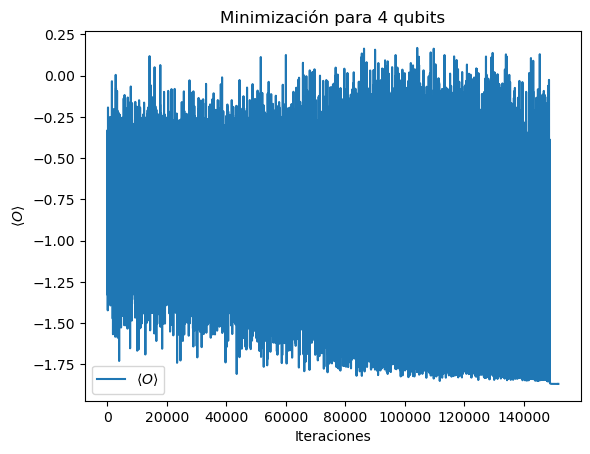

Fin ejecución con 4 qubits. Mínimo encontrado: -1.8680386376751572

Preparando ejecución para 5 qubits.
Se usarán 21 parámetros


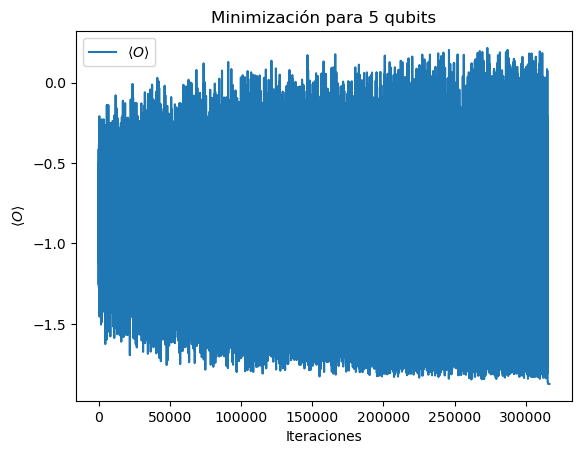

Fin ejecución con 5 qubits. Mínimo encontrado: -1.8733235813363935

Preparando ejecución para 6 qubits.
Se usarán 27 parámetros


KeyboardInterrupt: 

In [18]:
# Hamiltonians
with open(f"H2/data/hamiltonian0.719.pkl", "rb") as f:
    hamiltonian = pickle.load(f)


data = VQE_minimization_DE(anz.build_Nlocal_ansatz, 4, 12, hamiltonian)